# Implmenting Linear Regression

The goal for this notebook is to see if social media other than facebook and Twitter influence over the predictions performed by a base-case linear regression algorithm. We will:

1. Predict the voting preference with only Twitter and Facebook
2. See the results
3. Visualize the feature importance

And we will do the same but with Instagram and Youtube added to the features.

Will the same features remain important when YouTube and Instagram are added?

In [24]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
plt.style.use('fivethirtyeight')

In [25]:
# Utils
def average(lst): 
    return sum(lst) / len(lst) 
days = [1,2,3,4,5,6,7,14,21,28]
# IMPORTANT: Seeds to try
seeds = [1,2,3,4,5]
# Create a StandardScaler instance
scaler = StandardScaler()

### Columns Description

*Corresponding to the number of instances before a certain polling release date (e.g 24 XPosts located on a 1_1_ file belong to the number of X posts for candidate 1 over a span of 1 day before a specified date)*

* XPosts: Number of overall posts in X (Twitter)
* Xcomments: Number of overall comments in X
* XRts: Number of overall Rt´s in X
* XLikes: Number of overall likes in X
* XCommsPPost: Average number of comments per post for X
* XRtsPPost: Average number of Rts per post for X
* XLikesPPost: Average number of likes per post for X

* FBPosts: Number of overall posts in Facebook
* FBReactions: Number of overall reactions in Facebook
* FBComments: Number of overall comments in Facebook
* FBShares: Number of overall comments in Facebook
* FBCommsPPost: Average number of comments per post for Facebook
* FBReactsPPost: Average number of reactions per post for Facebook
* FBLikesPPost: Average number of likes per post for Facebook

* IGPosts: Number of overall posts in Instagram
* IGLikes: Number of overall likes in Instagram
* IGLikesPPost: Average number of likes per post for Instagram

* YTPosts: Number of overall posts in YouTube
* YTViews: Number of overall views in YouTube
* YTViewsPPost: Average number of views per post for YouTube

* Target: the reported vote share for the candidate


In [26]:
#Setting columns to use (see New_DB)
columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost', 'Target']

target = ['Target']

feature_columns_1 = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost']

feature_columns_2 = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost']

testing_columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost']

In [27]:
# Helper function for plotting feature importance
def plot_features(columns, importances, length):
    df = (pd.DataFrame({"features": columns, "feature_importance": importances}) .sort_values("feature_importance", ascending=False) .reset_index(drop=True))
    sns.barplot(x="feature_importance", y="features", data=df[:length], orient="h")

In [28]:
print(f"Number of features including only Facebook and X: {len(feature_columns_1)}")
print(f"Number of features including only Facebook and X: {len(feature_columns_2)}")
print(f"Number of features including only Facebook and X: {len(testing_columns)}")

Number of features including only Facebook and X: 20
Number of features including only Facebook and X: 14
Number of features including only Facebook and X: 7


## Predictions

Xóchitl Gálvez

In [20]:
model1 = LinearRegression()
predictions = []
importances = [0] * len(testing_columns)

data = pd.read_csv(f'../galvez/2_1.csv', usecols=columns, encoding="utf-8")
# Training and testing data; Remove last row which is the testing row
training = data.iloc[:-1]
testing = pd.DataFrame(data.iloc[-1])
testing = testing.T

In [32]:
model1 = LinearRegression()
predictions = []
importances = [0] * len(feature_columns_1)

for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../galvez/2_{i}.csv', usecols=columns, encoding="utf-8")
  # Training and testing data; Remove last row which is the testing row
  training = data.iloc[:-1]
  testing = pd.DataFrame(data.iloc[-1])
  testing = testing.T

  # Splitting
  X_train = training[feature_columns_1]
  X_test = testing[feature_columns_1]

  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  y_train = training[target]
  y_test = testing[target] 
  
  model1.fit(x_train_scaled, y_train)

  prediction = model1.predict(x_test_scaled)
  
  predictions.append(prediction)

  importances = importances + model1.coef_


In [33]:
predictions

[array([[32.06641846]]),
 array([[31.05303565]]),
 array([[27.14339285]]),
 array([[30.66888496]]),
 array([[29.49667819]]),
 array([[14.62741983]]),
 array([[36.47453701]]),
 array([[25.78834236]]),
 array([[40.51218923]]),
 array([[30.94046971]])]

In [34]:
average(predictions)

array([[29.87713682]])

In [18]:
print(f"The prediction is: {average(predictions)[0][0]}")
print(f"We have {len(predictions)} predictions feeding that average since we have {len(days)} days")

The prediction is: 25.166666666666668
We have 10 predictions feeding that average since we have 10 days


In [45]:
importances

array([[-0.7163917 ,  2.41034015,  0.02024367,  0.17508141,  2.65075068,
        -0.02010769,  0.70216786, -1.76779739, -0.32924771, -0.26725628,
        -0.17253854, -0.08652839,  0.16097374,  0.71356432, -2.42358201,
         1.06917492,  2.66673277,  0.41477123,  0.96182356,  0.71527145]])

In [46]:
importances = importances[0]/len(predictions)

In [47]:
importances

array([-0.07163917,  0.24103401,  0.00202437,  0.01750814,  0.26507507,
       -0.00201077,  0.07021679, -0.17677974, -0.03292477, -0.02672563,
       -0.01725385, -0.00865284,  0.01609737,  0.07135643, -0.2423582 ,
        0.10691749,  0.26667328,  0.04147712,  0.09618236,  0.07152714])

In [48]:
len(importances)

20

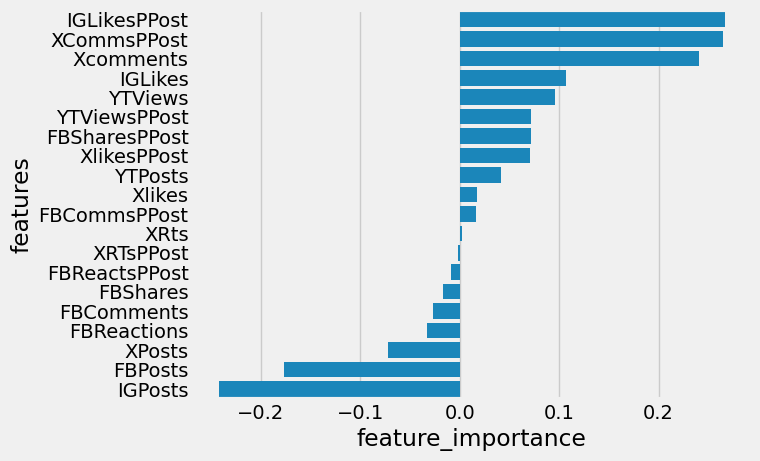

In [49]:
plot_features(X_train.columns, importances, len(importances))

In [50]:
mean_absolute_error(y_test, average(predictions))

3.1666666666666643